<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Load-genotype-data-from-PLINK-format-file-(.bed)" data-toc-modified-id="Load-genotype-data-from-PLINK-format-file-(.bed)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load genotype data from PLINK format file (.bed)</a></span><ul class="toc-item"><li><span><a href="#SnpArrays.jl-installation" data-toc-modified-id="SnpArrays.jl-installation-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span><code>SnpArrays.jl</code> installation</a></span></li><li><span><a href="#Initialize-SnpArray" data-toc-modified-id="Initialize-SnpArray-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Initialize <code>SnpArray</code></a></span></li><li><span><a href="#Summaries" data-toc-modified-id="Summaries-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Summaries</a></span></li><li><span><a href="#Convert-genotypes-to-numeric-values" data-toc-modified-id="Convert-genotypes-to-numeric-values-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Convert genotypes to numeric values</a></span></li></ul></li><li><span><a href="#Load-genotype-data-from-.RData" data-toc-modified-id="Load-genotype-data-from-.RData-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Load genotype data from .RData</a></span></li><li><span><a href="#Load-annotation-information-from-in-.RData" data-toc-modified-id="Load-annotation-information-from-in-.RData-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Load annotation information from in .RData</a></span></li><li><span><a href="#Read-candidate-gene-information-saved-in-.txt-file" data-toc-modified-id="Read-candidate-gene-information-saved-in-.txt-file-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Read candidate gene information saved in .txt file</a></span></li><li><span><a href="#Read-phenotype-information-saved-in-.txt-file" data-toc-modified-id="Read-phenotype-information-saved-in-.txt-file-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Read phenotype information saved in .txt file</a></span></li><li><span><a href="#Organize-data-for-performing-variance-component-selection" data-toc-modified-id="Organize-data-for-performing-variance-component-selection-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Organize data for performing variance component selection</a></span><ul class="toc-item"><li><span><a href="#Create-a-vector-of-matrices-V" data-toc-modified-id="Create-a-vector-of-matrices-V-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Create a vector of matrices <code>V</code></a></span></li></ul></li><li><span><a href="#Perform-variance-component-selection" data-toc-modified-id="Perform-variance-component-selection-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Perform variance component selection</a></span></li></ul></div>

## Introduction

This tutorial goes over how to use [`VarianceComponentSelect.jl`](https://github.com/juhkim111/VarianceComponentSelect.jl) using data saved in different format (`.bed`, `.RData`, `.txt`). 

Suppose we have the following files: 
* `hapmap3.bed` or `genotype.RData`: genotype data saved as `.bed` OR `.RData` file
* `annotation.RData`: gene annotation data saved as `.RData` 
* `covariate.txt`: phenotype (covariates and continuous trait of interest) saved as tab-delimited `.txt`
* `candidate_genes_sorted.txt`: list of candidate gene names saved as `.txt`

First let us change the working directory to the directory that contains above files.

In [4]:
cd("/Users/juhyun-kim/Box Sync/workspace/vcselect/codebase/julia/data-analysis")

Examine what files are in the directory.

In [6]:
using Glob
readdir(glob"*.bed", pwd()) 

1-element Array{String,1}:
 "/Users/juhyun-kim/Box Sync/workspace/vcselect/codebase/julia/data-analysis/hapmap3.bed"

In [7]:
readdir(glob"*.RData", pwd())

2-element Array{String,1}:
 "/Users/juhyun-kim/Box Sync/workspace/vcselect/codebase/julia/data-analysis/annotation.RData"
 "/Users/juhyun-kim/Box Sync/workspace/vcselect/codebase/julia/data-analysis/genotype.RData"  

In [8]:
readdir(glob"*.txt", pwd()) 

4-element Array{String,1}:
 "/Users/juhyun-kim/Box Sync/workspace/vcselect/codebase/julia/data-analysis/candidate_genes.txt"       
 "/Users/juhyun-kim/Box Sync/workspace/vcselect/codebase/julia/data-analysis/candidate_genes_sorted.txt"
 "/Users/juhyun-kim/Box Sync/workspace/vcselect/codebase/julia/data-analysis/covariate.txt"             
 "/Users/juhyun-kim/Box Sync/workspace/vcselect/codebase/julia/data-analysis/gene_annotation.txt"       

## Load genotype data from PLINK format file (.bed)

In this section, we read PLINK data and turn into 0/1/2/NA genotypes. This section requires `SnpArrays.jl` package.

### `SnpArrays.jl` installation 

[`SnpArrays.jl`](https://github.com/OpenMendel/SnpArrays.jl) package allows reading and manipulating SNP data saved as a `.bed` file. For more information about `SnpArrays.jl`, refer to its [documentation](https://openmendel.github.io/SnpArrays.jl/latest/). 

`SnpArrays.jl` requires Julia v0.7 or later, which can be obtained from (https://julialang.org/downloads/) or by building Julia from the sources in the (https://github.com/JuliaLang/julia) repository. 

The package has not yet been registered and must be installed using the repository location. Start julia and use the `]` key to switch to the package manager REPL

Use the backspace key to return to the Julia REPL.

### Initialize `SnpArray`

First load the package.

In [10]:
using SnpArrays

`SnpArray` is the fundamental type for dealing with genoytpe data in Plink bed file. Each row of `SnpArray` is a sample and each column a SNP.

Initialize `SnpArray` from the Plink bed file. The corresponding `.fam` needs to be present in order to determine the number of individuals.

In [11]:
const hapmap3 = SnpArray("hapmap3.bed")

324×13928 SnpArray:
 0x03  0x03  0x00  0x03  0x03  0x03  …  0x02  0x02  0x02  0x03  0x03  0x03
 0x03  0x02  0x02  0x02  0x03  0x03     0x03  0x03  0x03  0x03  0x02  0x03
 0x03  0x03  0x02  0x02  0x02  0x03     0x03  0x03  0x03  0x03  0x03  0x03
 0x03  0x03  0x02  0x03  0x02  0x03     0x02  0x02  0x02  0x03  0x03  0x03
 0x03  0x03  0x02  0x02  0x03  0x03     0x03  0x03  0x03  0x03  0x03  0x03
 0x03  0x02  0x03  0x03  0x00  0x03  …  0x02  0x02  0x02  0x03  0x03  0x03
 0x03  0x03  0x03  0x03  0x00  0x03     0x03  0x03  0x03  0x03  0x03  0x03
 0x03  0x03  0x00  0x03  0x03  0x03     0x03  0x03  0x03  0x03  0x03  0x03
 0x03  0x03  0x02  0x02  0x03  0x03     0x03  0x03  0x03  0x03  0x03  0x03
 0x03  0x03  0x02  0x03  0x03  0x03     0x02  0x02  0x02  0x03  0x03  0x03
 0x03  0x03  0x02  0x03  0x03  0x03  …  0x03  0x03  0x03  0x03  0x03  0x03
 0x03  0x03  0x03  0x02  0x03  0x03     0x02  0x02  0x02  0x03  0x03  0x03
 0x03  0x03  0x00  0x03  0x02  0x03     0x02  0x02  0x02  0x03  0x03  0x03
    ⋮

The data has 324 individuals at each of 13928 SNP positions.

In [12]:
size(hapmap3)

(324, 13928)

If only the bed file is present, supply the number of individuals in the second argument. 

In [13]:
SnpArray("hapmap3.bed", 324)

324×13928 SnpArray:
 0x03  0x03  0x00  0x03  0x03  0x03  …  0x02  0x02  0x02  0x03  0x03  0x03
 0x03  0x02  0x02  0x02  0x03  0x03     0x03  0x03  0x03  0x03  0x02  0x03
 0x03  0x03  0x02  0x02  0x02  0x03     0x03  0x03  0x03  0x03  0x03  0x03
 0x03  0x03  0x02  0x03  0x02  0x03     0x02  0x02  0x02  0x03  0x03  0x03
 0x03  0x03  0x02  0x02  0x03  0x03     0x03  0x03  0x03  0x03  0x03  0x03
 0x03  0x02  0x03  0x03  0x00  0x03  …  0x02  0x02  0x02  0x03  0x03  0x03
 0x03  0x03  0x03  0x03  0x00  0x03     0x03  0x03  0x03  0x03  0x03  0x03
 0x03  0x03  0x00  0x03  0x03  0x03     0x03  0x03  0x03  0x03  0x03  0x03
 0x03  0x03  0x02  0x02  0x03  0x03     0x03  0x03  0x03  0x03  0x03  0x03
 0x03  0x03  0x02  0x03  0x03  0x03     0x02  0x02  0x02  0x03  0x03  0x03
 0x03  0x03  0x02  0x03  0x03  0x03  …  0x03  0x03  0x03  0x03  0x03  0x03
 0x03  0x03  0x03  0x02  0x03  0x03     0x02  0x02  0x02  0x03  0x03  0x03
 0x03  0x03  0x00  0x03  0x02  0x03     0x02  0x02  0x02  0x03  0x03  0x03
    ⋮

### Summaries 

Let us examine the data.
Minor allele frequencies (MAF) for each SNP:

In [14]:
maf(hapmap3)

13928-element Array{Float64,1}:
 0.0                  
 0.07763975155279501  
 0.32407407407407407  
 0.19158878504672894  
 0.441358024691358    
 0.0                  
 0.00462962962962965  
 0.4537037037037037   
 0.22685185185185186  
 0.1448598130841121   
 0.0                  
 0.4830246913580247   
 0.2538699690402477   
 ⋮                    
 0.23993808049535603  
 0.23993808049535603  
 0.25548589341692785  
 0.23913043478260865  
 0.23831775700934577  
 0.3109375            
 0.23913043478260865  
 0.23913043478260865  
 0.23913043478260865  
 0.0015432098765432167
 0.04179566563467496  
 0.006172839506172867 

Location/positions of the missing data are evaluated by 

In [15]:
mp = missingpos(hapmap3)

324×13928 SparseArrays.SparseMatrixCSC{Bool,Int32} with 11894 stored entries:
  [110  ,     1]  =  true
  [133  ,     1]  =  true
  [215  ,     1]  =  true
  [242  ,     1]  =  true
  [203  ,     2]  =  true
  [237  ,     2]  =  true
  [96   ,     4]  =  true
  [126  ,     4]  =  true
  [169  ,     4]  =  true
  [79   ,    10]  =  true
  [248  ,    10]  =  true
  [283  ,    10]  =  true
  ⋮
  [263  , 13921]  =  true
  [146  , 13922]  =  true
  [169  , 13922]  =  true
  [269  , 13922]  =  true
  [299  , 13922]  =  true
  [96   , 13923]  =  true
  [283  , 13923]  =  true
  [96   , 13924]  =  true
  [281  , 13924]  =  true
  [96   , 13925]  =  true
  [207  , 13925]  =  true
  [237  , 13927]  =  true

The number of missing data values in each column can be seen as

In [16]:
sum(mp, dims=1)

1×13928 Array{Int64,2}:
 4  2  0  3  0  0  0  0  0  3  2  0  1  …  1  1  5  2  3  4  2  2  2  0  1  0

### Convert genotypes to numeric values

We convert genotypes to numeric values for statistical analysis using `convert` function in `SnpArrays.jl`. 

By default, `convert` function translates genotypes according to the *additive* SNP model, which essentially counts the number of **A2** allele (0, 1, or 2) per genotype.

| Genotype | `SnpArray` | `model=ADDITIVE_MODEL` | `model=DOMINANT_MODEL` | `model=RECESSIVE_MODEL` |    
|:---:|:---:|:---:|:---:|:---:|  
| A1,A1 | 0x00 | 0 | 0 | 0 |  
| missing | 0x01 | NaN | NaN | NaN |
| A1,A2 | 0x02 | 1 | 1 | 0 |  
| A2,A2 | 0x03 | 2 | 1 | 1 |  

For more information, refer to [`SnpArrays.jl`](https://openmendel.github.io/SnpArrays.jl/latest/#convert-and-copyto!-1) documentation.


Convert whole SnpArray to a Float64 matrix using defaults (`model=ADDITIVE_MODEL, center=false, scale=false, impute=false`)

In [17]:
G = convert(Matrix{Float64}, hapmap3)

324×13928 Array{Float64,2}:
 2.0  2.0  0.0  2.0  2.0  2.0  1.0  1.0  …  1.0  1.0  1.0  1.0  2.0  2.0  2.0
 2.0  1.0  1.0  1.0  2.0  2.0  2.0  1.0     2.0  2.0  2.0  2.0  2.0  1.0  2.0
 2.0  2.0  1.0  1.0  1.0  2.0  2.0  0.0     1.0  2.0  2.0  2.0  2.0  2.0  2.0
 2.0  2.0  1.0  2.0  1.0  2.0  2.0  1.0     1.0  1.0  1.0  1.0  2.0  2.0  2.0
 2.0  2.0  1.0  1.0  2.0  2.0  2.0  0.0     2.0  2.0  2.0  2.0  2.0  2.0  2.0
 2.0  1.0  2.0  2.0  0.0  2.0  2.0  2.0  …  0.0  1.0  1.0  1.0  2.0  2.0  2.0
 2.0  2.0  2.0  2.0  0.0  2.0  2.0  0.0     1.0  2.0  2.0  2.0  2.0  2.0  2.0
 2.0  2.0  0.0  2.0  2.0  2.0  2.0  1.0     2.0  2.0  2.0  2.0  2.0  2.0  2.0
 2.0  2.0  1.0  1.0  2.0  2.0  2.0  0.0     2.0  2.0  2.0  2.0  2.0  2.0  2.0
 2.0  2.0  1.0  2.0  2.0  2.0  2.0  0.0     1.0  1.0  1.0  1.0  2.0  2.0  2.0
 2.0  2.0  1.0  2.0  2.0  2.0  2.0  0.0  …  2.0  2.0  2.0  2.0  2.0  2.0  2.0
 2.0  2.0  2.0  1.0  2.0  2.0  2.0  0.0     1.0  1.0  1.0  1.0  2.0  2.0  2.0
 2.0  2.0  0.0  2.0  1.0  2.0  2.0  

Recall there are 11,894 missing values (coded as `NaN`).

In [18]:
# number of NaN values 
sum(isnan.(G))

11894

We can use `impute=true` argument in `convert` function to impute missing genotypes by column mean. 

In [19]:
Gimputed = convert(Matrix{Float64}, hapmap3, impute=true)

324×13928 Array{Float64,2}:
 2.0  2.0  0.0  2.0  2.0  2.0  1.0  1.0  …  1.0  1.0  1.0  1.0  2.0  2.0  2.0
 2.0  1.0  1.0  1.0  2.0  2.0  2.0  1.0     2.0  2.0  2.0  2.0  2.0  1.0  2.0
 2.0  2.0  1.0  1.0  1.0  2.0  2.0  0.0     1.0  2.0  2.0  2.0  2.0  2.0  2.0
 2.0  2.0  1.0  2.0  1.0  2.0  2.0  1.0     1.0  1.0  1.0  1.0  2.0  2.0  2.0
 2.0  2.0  1.0  1.0  2.0  2.0  2.0  0.0     2.0  2.0  2.0  2.0  2.0  2.0  2.0
 2.0  1.0  2.0  2.0  0.0  2.0  2.0  2.0  …  0.0  1.0  1.0  1.0  2.0  2.0  2.0
 2.0  2.0  2.0  2.0  0.0  2.0  2.0  0.0     1.0  2.0  2.0  2.0  2.0  2.0  2.0
 2.0  2.0  0.0  2.0  2.0  2.0  2.0  1.0     2.0  2.0  2.0  2.0  2.0  2.0  2.0
 2.0  2.0  1.0  1.0  2.0  2.0  2.0  0.0     2.0  2.0  2.0  2.0  2.0  2.0  2.0
 2.0  2.0  1.0  2.0  2.0  2.0  2.0  0.0     1.0  1.0  1.0  1.0  2.0  2.0  2.0
 2.0  2.0  1.0  2.0  2.0  2.0  2.0  0.0  …  2.0  2.0  2.0  2.0  2.0  2.0  2.0
 2.0  2.0  2.0  1.0  2.0  2.0  2.0  0.0     1.0  1.0  1.0  1.0  2.0  2.0  2.0
 2.0  2.0  0.0  2.0  1.0  2.0  2.0  

Now there is no missing values in `Gimputed`.

In [20]:
sum(isnan.(Gimputed))

0

## Load genotype data from .RData

Now suppose genotype information is stored in `.RData`. 
To read R objects from `.RData` file, we need to add `RData` package in Julia. 
Start Julia and use the `]` key to switch to the package manager REPL

Or simply do from Julia REPL 

In [45]:
using Pkg
Pkg.add("RData")

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
Fetching: [========================================>]  100.0 %.0 % Resolving package versions...
  Updating `~/.julia/environments/v1.1/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.1/Manifest.toml`
 [no changes]


Now we load `genotype.RData` file, which stores R object called "geno" and "geno_imputed". "geno" refers to genotype matrix with missing values while "geno_imputed" denotes imputed genotype matrix.

In [57]:
using RData
genotype = load("/Users/juhyun-kim/Box Sync/workspace/vcselect/codebase/julia/data-analysis/genotype.RData")

Dict{String,Any} with 2 entries:
  "geno"         => 324×13928 DataFrames.DataFrame. Omitted printing of 13921 c…
  "geno_imputed" => 324×13928 DataFrames.DataFrame. Omitted printing of 13921 c…

We can access "geno" and "geno_imputed" using following commands:

In [58]:
genotype["geno"]

,V1,V2,V3,V4,V5,V6,V7,V8,V9
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,2.0,2.0,0.0,2.0,2.0,2.0,1.0,1.0,2.0
2,2.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0
3,2.0,2.0,1.0,1.0,1.0,2.0,2.0,0.0,1.0
4,2.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0
5,2.0,2.0,1.0,1.0,2.0,2.0,2.0,0.0,2.0
6,2.0,1.0,2.0,2.0,0.0,2.0,2.0,2.0,2.0
7,2.0,2.0,2.0,2.0,0.0,2.0,2.0,0.0,1.0
8,2.0,2.0,0.0,2.0,2.0,2.0,2.0,1.0,2.0
9,2.0,2.0,1.0,1.0,2.0,2.0,2.0,0.0,2.0


In [59]:
typeof(genotype["geno"])

DataFrames.DataFrame

Since `genotype["geno"]` is a DataFrame, we convert it to matrix of float by 

In [60]:
G2 = convert(Matrix{Float64}, genotype["geno"])

324×13928 Array{Float64,2}:
 2.0  2.0  0.0  2.0  2.0  2.0  1.0  1.0  …  1.0  1.0  1.0  1.0  2.0  2.0  2.0
 2.0  1.0  1.0  1.0  2.0  2.0  2.0  1.0     2.0  2.0  2.0  2.0  2.0  1.0  2.0
 2.0  2.0  1.0  1.0  1.0  2.0  2.0  0.0     1.0  2.0  2.0  2.0  2.0  2.0  2.0
 2.0  2.0  1.0  2.0  1.0  2.0  2.0  1.0     1.0  1.0  1.0  1.0  2.0  2.0  2.0
 2.0  2.0  1.0  1.0  2.0  2.0  2.0  0.0     2.0  2.0  2.0  2.0  2.0  2.0  2.0
 2.0  1.0  2.0  2.0  0.0  2.0  2.0  2.0  …  0.0  1.0  1.0  1.0  2.0  2.0  2.0
 2.0  2.0  2.0  2.0  0.0  2.0  2.0  0.0     1.0  2.0  2.0  2.0  2.0  2.0  2.0
 2.0  2.0  0.0  2.0  2.0  2.0  2.0  1.0     2.0  2.0  2.0  2.0  2.0  2.0  2.0
 2.0  2.0  1.0  1.0  2.0  2.0  2.0  0.0     2.0  2.0  2.0  2.0  2.0  2.0  2.0
 2.0  2.0  1.0  2.0  2.0  2.0  2.0  0.0     1.0  1.0  1.0  1.0  2.0  2.0  2.0
 2.0  2.0  1.0  2.0  2.0  2.0  2.0  0.0  …  2.0  2.0  2.0  2.0  2.0  2.0  2.0
 2.0  2.0  2.0  1.0  2.0  2.0  2.0  0.0     1.0  1.0  1.0  1.0  2.0  2.0  2.0
 2.0  2.0  0.0  2.0  1.0  2.0  2.0  

Similarly for `genotype["geno_imputed]`:

In [62]:
Gimputed2 = convert(Matrix{Float64}, genotype["geno_imputed"])

324×13928 Array{Float64,2}:
 2.0  2.0  0.0  2.0  2.0  2.0  1.0  1.0  …  1.0  1.0  1.0  1.0  2.0  2.0  2.0
 2.0  1.0  1.0  1.0  2.0  2.0  2.0  1.0     2.0  2.0  2.0  2.0  2.0  1.0  2.0
 2.0  2.0  1.0  1.0  1.0  2.0  2.0  0.0     1.0  2.0  2.0  2.0  2.0  2.0  2.0
 2.0  2.0  1.0  2.0  1.0  2.0  2.0  1.0     1.0  1.0  1.0  1.0  2.0  2.0  2.0
 2.0  2.0  1.0  1.0  2.0  2.0  2.0  0.0     2.0  2.0  2.0  2.0  2.0  2.0  2.0
 2.0  1.0  2.0  2.0  0.0  2.0  2.0  2.0  …  0.0  1.0  1.0  1.0  2.0  2.0  2.0
 2.0  2.0  2.0  2.0  0.0  2.0  2.0  0.0     1.0  2.0  2.0  2.0  2.0  2.0  2.0
 2.0  2.0  0.0  2.0  2.0  2.0  2.0  1.0     2.0  2.0  2.0  2.0  2.0  2.0  2.0
 2.0  2.0  1.0  1.0  2.0  2.0  2.0  0.0     2.0  2.0  2.0  2.0  2.0  2.0  2.0
 2.0  2.0  1.0  2.0  2.0  2.0  2.0  0.0     1.0  1.0  1.0  1.0  2.0  2.0  2.0
 2.0  2.0  1.0  2.0  2.0  2.0  2.0  0.0  …  2.0  2.0  2.0  2.0  2.0  2.0  2.0
 2.0  2.0  2.0  1.0  2.0  2.0  2.0  0.0     1.0  1.0  1.0  1.0  2.0  2.0  2.0
 2.0  2.0  0.0  2.0  1.0  2.0  2.0  

## Load annotation information from in .RData

To read R objects from `.RData` file, we need to add `RData` package in Julia. 
Start Julia and use the `]` key to switch to the package manager REPL

Or simply do from Julia REPL 

In [54]:
using Pkg
Pkg.add("RData")

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
Fetching: [========================================>]  100.0 %.0 % Resolving package versions...
  Updating `~/.julia/environments/v1.1/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.1/Manifest.toml`
 [no changes]


Now we load `annotation.RData` file, which stores R object called "ann". 

In [64]:
using RData
ann_file = load("/Users/juhyun-kim/Box Sync/workspace/vcselect/codebase/julia/data-analysis/annotation.RData")

Dict{String,Any} with 1 entry:
  "ann" => 13928×7 DataFrames.DataFrame. Omitted printing of 1 columns…

We can access "ann" object using following command:

In [65]:
df_ann = ann_file["ann"]

,CHROM,SNP_NAME,DIST,CHROM_POS,A1,A2,GENE_NAME
,Int32,Categorical…,Int32,Int32,Int32,Int32,Categorical…
1,1,rs10458597,0,554484,0,2,gene1
2,1,rs12562034,0,758311,1,2,gene1
3,1,rs2710875,0,967643,1,2,gene1
4,1,rs11260566,0,1168108,1,2,gene1
5,1,rs1312568,0,1375074,1,2,gene1
6,1,rs35154105,0,1588771,0,2,gene1
7,1,rs16824508,0,1789051,1,2,gene1
8,1,rs2678939,0,1990452,1,2,gene1
9,1,rs7553178,0,2194615,1,2,gene1


`df_ann` contains information of 13,928 SNPs, including its chromosome (`df_ann.CHROM`), SNP name (`df_ann.SNP_NAME`), chromosome position (`df_ann.CHROM_POS`), and gene annotation (`df_ann.GENE_NAME`). 

## Read candidate gene information saved in .txt file

Names of candidate/target genes are saved in *tab-delimited* `candidate_genes.txt`. We read the file using 

In [52]:
using DelimitedFiles # make sure you add the package if not installed 
candidates = readdlm("candidate_genes_sorted.txt", '\t') # use '\t' since tab-delimited 


150×1 Array{Any,2}:
 "gene2"  
 "gene5"  
 "gene6"  
 "gene8"  
 "gene10" 
 "gene11" 
 "gene13" 
 "gene16" 
 "gene18" 
 "gene20" 
 "gene21" 
 "gene22" 
 "gene27" 
 ⋮        
 "gene294"
 "gene295"
 "gene296"
 "gene300"
 "gene301"
 "gene302"
 "gene305"
 "gene308"
 "gene309"
 "gene314"
 "gene321"
 "gene324"

We have a list of candidate gene names. There are 150 such genes out of 324 genes.

Now we find rows in `df_ann`  that contain candidate genes.

In [53]:
candid_idx = findall(in(candidates), ann.GENE_NAME)

UndefVarError: UndefVarError: ann not defined

In [182]:
filter(r -> any(occursin.(candidates, r.GENE_NAME)), ann)

,CHROM,SNP_NAME,DIST,CHROM_POS,A1,A2,GENE_NAME
,Int32,Categorical…,Int32,Int32,Int32,Int32,Categorical…
1,1,rs4926480,0,9534606,1,2,gene2
2,1,rs12047054,0,9737551,1,2,gene2
3,1,rs7518021,0,9940789,1,2,gene2
4,1,rs2273298,0,10140964,1,2,gene2
5,1,rs7546368,0,10341413,1,2,gene2
6,1,rs7512467,0,10544961,1,2,gene2
7,1,rs11121613,0,10746361,1,2,gene2
8,1,rs6659231,0,10946940,1,2,gene2
9,1,rs11121695,0,11152102,1,2,gene2


## Read phenotype information saved in .txt file 

First load the package necessary for this section. 

In [43]:
using CSV

Read the data from `covariate.txt`.

In [44]:
pheno = CSV.read("covariate.txt"; header=true, delim='\t') # use '\t' since tab-delimited 

,famid,perid,faid,moid,sex,trait,trait2
,String,String,Int64,Int64,Int64,Int64,Float64
1,2431,NA19916,0,0,1,4,0.518175
2,2424,NA19835,0,0,2,4,1.75633
3,2469,NA20282,0,0,2,4,2.22347
4,2368,NA19703,0,0,1,3,1.2579
5,2425,NA19901,0,0,2,3,1.86081
6,2427,NA19908,0,0,1,4,1.02811
7,2430,NA19914,0,0,2,4,2.0572
8,2470,NA20287,0,0,2,1,1.77039
9,2436,NA19713,0,0,2,3,1.94646


For the purpose of our analysis, we use sex as our covariate and trait2 as our phenotype of interest. We will save sex and trait2 as `X` and `y`, respectively. 

In [82]:
X = convert(Array{Float64}, pheno.sex)
X = reshape(X, 324, 1)

324×1 Array{Float64,2}:
 1.0
 2.0
 2.0
 1.0
 2.0
 1.0
 2.0
 2.0
 2.0
 1.0
 2.0
 1.0
 1.0
 ⋮  
 1.0
 1.0
 2.0
 2.0
 2.0
 1.0
 1.0
 2.0
 1.0
 1.0
 1.0
 2.0

In [49]:
y = convert(Vector{Float64}, pheno.trait2)

324-element Array{Float64,1}:
 0.5181745783923235 
 1.7563255876086767 
 2.223470160560045  
 1.2579006587307098 
 1.860806437353566  
 1.028112990433079  
 2.057200135128053  
 1.770392906691606  
 1.946456043807813  
 1.2653273055152228 
 1.8210363054066185 
 0.9816735058475288 
 1.0196433215039131 
 ⋮                  
 1.3010252611690536 
 0.42529129561611123
 1.9899018399604986 
 2.144082020327153  
 1.7611984430688867 
 1.0324355558326748 
 0.7221317205804793 
 2.1139274496036498 
 1.1352386348242873 
 1.7520987036916529 
 0.8829809046246783 
 2.035154064202062  

## Organize data for performing variance component selection

For this section, we need package `LinearAlgebra`.

To add the package, start Julia and use the `]` key to switch to the package manager REPL

### Create a vector of matrices `V`

Suppose $y$ is a phenotype vector, $X$ is a covariate matrix, and $G_1, \ldots, G_m$ are genotype matrices for $i$-th gene, $i=1,\ldots, m$.

We assume $$y \sim \text{Normal}(X\beta, \sigma_1^2 V_1 + \ldots + \sigma_m^2 V_m + \sigma_0^2 I)$$

where $V_i$ is a kernel function for $i$-th gene and $V_i$ has Frobenius norm equal to 1. 

Here we simply use linear kernel function $V_i = G_iG_i^T$. However, any kernel function could be used to model the relationship among the effect sizes of the variants on the phenotypes. For example,
   1. $V_i = G_iW_iG_i^T$ where $W_i = diag(w_1, \ldots, w_{q_i})$ specifies weights of variants in $i$-th gene: uncorrelated effect sizes and corresponds to SKAT
   2. $V_i = G_iW_i1_{q_i}1_{q_i}^TW_iG_i^T$: correponds to the Burden test 

(Dutta, D., Scott, L., Boehnke, M., & Lee, S. (2019). Multi‐SKAT: General framework to test for rare‐variant association with multiple phenotypes. Genetic epidemiology, 43(1), 4-23.)

We use `Gimputed2` for our genotype matrix $G$. We create $V_i$ for gene $i$ by going through the list of candidate gene names and subsetting SNPs that belong to gene $i$.

In [66]:
using LinearAlgebra
# no. of candidate genes 
m = length(candidates)
# sample size 
n = size(Gimputed2, 1)
# initialize array 
V  = Array{Matrix{Float64}}(undef, m + 1)
for i in 1:m 
    # find indices of SNPs annotated to be gene i 
    tmp_idx = findall(x -> x == candidates[i], df_ann.GENE_NAME)
    # subset genotype matrix using those indices 
    Gi = Gimputed2[:, tmp_idx]
    # multiply by its transpose 
    V[i] = Gi * Gi'
    # divide by its frobenius norm 
    V[i] = V[i] / norm(V[i])    
end 
V[end] = Matrix(I, n, n) ./ √n

324×324 Array{Float64,2}:
 0.0555556  0.0        0.0        …  0.0        0.0        0.0      
 0.0        0.0555556  0.0           0.0        0.0        0.0      
 0.0        0.0        0.0555556     0.0        0.0        0.0      
 0.0        0.0        0.0           0.0        0.0        0.0      
 0.0        0.0        0.0           0.0        0.0        0.0      
 0.0        0.0        0.0        …  0.0        0.0        0.0      
 0.0        0.0        0.0           0.0        0.0        0.0      
 0.0        0.0        0.0           0.0        0.0        0.0      
 0.0        0.0        0.0           0.0        0.0        0.0      
 0.0        0.0        0.0           0.0        0.0        0.0      
 0.0        0.0        0.0        …  0.0        0.0        0.0      
 0.0        0.0        0.0           0.0        0.0        0.0      
 0.0        0.0        0.0           0.0        0.0        0.0      
 ⋮                                ⋱                                 
 0.0    

`V` is a vector of 324x324 matrices.

In [68]:
V

151-element Array{Array{Float64,2},1}:
 [0.00329167 0.00302173 … 0.00308537 0.00299512; 0.00302173 0.00317597 … 0.00292075 0.00296242; … ; 0.00308537 0.00292075 … 0.0033536 0.00305443; 0.00299512 0.00296242 … 0.00305443 0.0034696]  
 [0.00387367 0.00315427 … 0.00345863 0.00367999; 0.00315427 0.00309894 … 0.00323728 0.00309894; … ; 0.00345863 0.00323728 … 0.00373533 0.0034033; 0.00367999 0.00309894 … 0.0034033 0.00379066]  
 [0.00313494 0.00296215 … 0.00301152 0.00273999; 0.00296215 0.00328305 … 0.00306089 0.00283873; … ; 0.00301152 0.00306089 … 0.00340647 0.00301152; 0.00273999 0.00283873 … 0.00301152 0.00315963]
 [0.00304739 0.00275335 … 0.00259296 0.00299393; 0.00275335 0.00302066 … 0.00261969 0.00291373; … ; 0.00259296 0.00261969 … 0.00299393 0.002887; 0.00299393 0.00291373 … 0.002887 0.00350183]    
 [0.00340443 0.00283702 … 0.00274743 0.00310579; 0.00283702 0.00313566 … 0.00265784 0.00286689; … ; 0.00274743 0.00265784 … 0.00313566 0.00286689; 0.00310579 0.00286689 … 0.00286689 0.0

In [67]:
# # note that this would NOT work 
# using LinearAlgebra
# m = length(candidates)
# n = size(Gimputed, 1)
# W  = Array{Matrix}(undef, m + 1)
# for i in 1:m 
#     tmp_idx = findall(x -> x == candidates[i], ann.GENE_NAME)
#     Gi = Gimputed[:, tmp_idx]
#     W[i] = Gi * Gi'
#     W[i] = V[i] / norm(V[i])    
# end 
# W[end] = Matrix(I, n, n) ./ √n

## Perform variance component selection 

In [69]:
using VarianceComponentSelect

In [70]:
vcselect(y, V)

([5.71611, 20.6102, 0.00342382, 13.8313, 50.6281, 4.04255e-20, 6.32991e-37, 3.35165e-49, 0.297906, 1.99368e-18  …  1.11611e-13, 2.53736e-43, 2.09571e-6, 48.8436, 2.40668e-14, 1.61607e-23, 2.56459e-23, 3.00323e-81, 7.388, 2.95739e-11], 243.31369510340525, 561, [3.39768 3.04416 … 3.02071 3.04078; 3.04416 3.3484 … 2.99835 3.02002; … ; 3.02071 2.99835 … 3.35741 3.00633; 3.04078 3.02002 … 3.00633 3.35595])

In [83]:
σ2path, _, λpath, _, βpath = vcselectpath(y, X, V; penfun=L1Penalty(), fixedeffects=true)

([0.993703 0.996719 … 0.71636 0.715347; 1.504 1.50391 … 1.44469 1.44311; … ; 0.510493 0.50795 … 0.534287 0.533537; 1.09191e-18 1.22196e-20 … 7.79298e-99 8.43155e-99], [-4.80231, -4.21036, -3.62797, -3.05535, -2.47766, -1.9008, -1.32474, -0.749542, -0.175295, 0.382434  …  42.4089, 42.9063, 43.4034, 43.9002, 44.3966, 44.8928, 45.3886, 45.884, 46.3792, 46.874], 0.0:0.0234448952480651:2.321044629558445, [783, 81, 479, 605, 14, 33, 43, 58, 111, 492  …  3, 3, 3, 3, 3, 3, 3, 3, 3, 3], [1.03507 1.03505 … 1.03549 1.0355])

In [77]:
ranking, rest = rankvarcomps(σ2path)

([1, 2, 6, 17, 18, 35, 40, 57, 59, 62  …  101, 43, 115, 10, 29, 54, 13, 130, 21, 44], [4, 5, 7, 8, 9, 11, 12, 14, 15, 16  …  138, 139, 140, 141, 144, 145, 146, 147, 149, 151])

In [78]:
ranking

37-element Array{Int64,1}:
   1
   2
   6
  17
  18
  35
  40
  57
  59
  62
  71
  78
  80
   ⋮
   3
  55
 101
  43
 115
  10
  29
  54
  13
 130
  21
  44

In [79]:
# truth:  1, 38, 75, 112, 150
for i in [1, 38, 75, 112, 150]
    if i ∈ ranking 
        println("gene $i is found to be associated with phenotype `y`")
    else
        println("gene $i is found to be NOT associated with phenotype `y`")
    end 
end 

gene 1 is found to be associated with phenotype `y`
gene 38 is found to be NOT associated with phenotype `y`
gene 75 is found to be NOT associated with phenotype `y`
gene 112 is found to be NOT associated with phenotype `y`
gene 150 is found to be associated with phenotype `y`


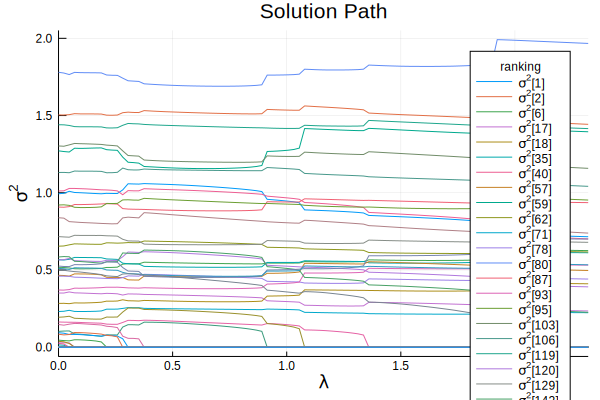

In [248]:
using Plots 
gr()
plotsolpath(σ2path, λpath)